# Tensorflow Tutorial 10
参考文献
- [306_dataset.py](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/306_dataset.py)

In [0]:
import tensorflow as tf
import numpy as np

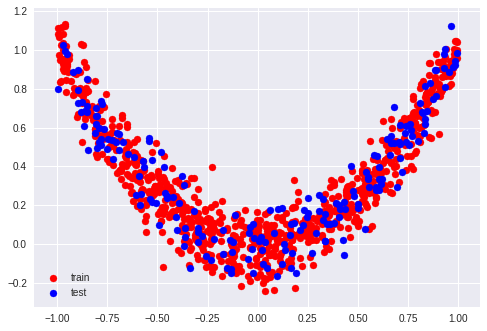

In [5]:
# load your data or create your data in here
npx = np.random.uniform(-1, 1, (1000, 1))                           # x data
npy = np.power(npx, 2) + np.random.normal(0, 0.1, size=npx.shape)   # y data
npx_train, npx_test = np.split(npx, [800])                          # training and test data
npy_train, npy_test = np.split(npy, [800])

import matplotlib.pyplot as plt
plt.scatter(npx_train, npy_train, c='red', label='train')
plt.scatter(npx_test, npy_test, c='blue', label='test')
plt.legend()
plt.show()

In [0]:
# use placeholder, later you may need different data, pass the different data into placeholder
tfx = tf.placeholder(npx_train.dtype, npx_train.shape)
tfy = tf.placeholder(npy_train.dtype, npy_train.shape)

In [0]:
# create dataloader
dataset = tf.data.Dataset.from_tensor_slices((tfx, tfy))
dataset = dataset.shuffle(buffer_size=1000)   # choose data randomly from this buffer
dataset = dataset.batch(32)                   # batch size you will use
dataset = dataset.repeat(3)                   # repeat for 3 epochs
iterator = dataset.make_initializable_iterator()  # later we have to initialize this one

In [0]:
# your network
bx, by = iterator.get_next()                  # use batch to update
l1 = tf.layers.dense(bx, 10, tf.nn.relu)
out = tf.layers.dense(l1, npy.shape[1])
loss = tf.losses.mean_squared_error(by, out)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [9]:
sess = tf.Session()
# need to initialize the iterator in this case
sess.run([iterator.initializer, tf.global_variables_initializer()], feed_dict={tfx: npx_train, tfy: npy_train})


[None, None]

In [10]:
for step in range(201):
  try:
    _, trainl = sess.run([train, loss])                       # train
    if step % 10 == 0:
      testl = sess.run(loss, {bx: npx_test, by: npy_test})    # test
      print('step: %i/200' % step, '|train loss:', trainl, '|test loss:', testl)
  except tf.errors.OutOfRangeError:     # if training takes more than 3 epochs, training will be stopped
    print('Finish the last epoch.')
    break

step: 0/200 |train loss: 0.45445958 |test loss: 0.29970878
step: 10/200 |train loss: 0.082800865 |test loss: 0.10521248
step: 20/200 |train loss: 0.116564274 |test loss: 0.088397734
step: 30/200 |train loss: 0.09026429 |test loss: 0.07924373
step: 40/200 |train loss: 0.060279865 |test loss: 0.074603155
step: 50/200 |train loss: 0.09890355 |test loss: 0.06451826
step: 60/200 |train loss: 0.042253032 |test loss: 0.059956003
step: 70/200 |train loss: 0.052769423 |test loss: 0.053739242
Finish the last epoch.
